# RNA-seq Practice Notebook
_This notebook is going to be documentation of what I learned in my self study of rna-seq data analysis using PyDESeq2_

# **Part 1: Original Protocol Exploration**
_these cells follow protocol for comprehension_



## 1.1 - Overview

* WHAT does DESeq2 do in simple words?
  * it is a tool used to analyze RNA sequencing data which help you figure out which genes show significant changes in expression levels between 2 or more groups of samples.
* HOW does it do that?
  * It compares RNA counts (gene transcripts) are present in each sample
    * Counts tell you how "active" each gene is.
  *normalizes the data and runs statistical tests to find genes that are consistently more or less active in one group compared to another.
* WHY does differential expression analysis matter?
  * Tells you how gene expression changes in response to different conditions (like drug treatments, disease states, stress, or development)  
    * Can reveal important biological mechanisms, potential drug targets, or biomarkers.


## 1.2 - Required Import Packages

In [1]:
# Install PyDESeq2 in Colab (only needed once per session)
!pip install pydeseq2

#import required packages
import os
import pickle as pkl

import numpy as np

from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats
from pydeseq2.utils import load_example_data

#prepare for saving files
SAVE = False  # whether to save the outputs of this notebook

if SAVE:
    # Replace this with the path to directory where you would like results to be
    # saved
    OUTPUT_PATH = "../output_files/synthetic_example"
    os.makedirs(OUTPUT_PATH, exist_ok=True)  # Create path if it doesn't exist

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.4/255.4 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 89.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 3.7 MB/s eta 0:00:00


## 1.3 - Data Loading

* PyDESeq2 requires **two types of inputs** to perform differential expression analysis (DEA):
  * count matrix
    * shape: '# of samples' x '# of genes'
    * containing read counts (non-negative integers)
  * Metadata
    * shape: '# of samples' x '# of variables'
    * containing sample annotations that will be used to split data in cohorts
  * **BOTH should be provided as pandas dataframes**

In [2]:
#loading an example dataset

counts_df = load_example_data(
    modality="raw_counts",
    dataset="synthetic",
    debug=False,
)

metadata = load_example_data(
    modality="metadata",
    dataset="synthetic",
    debug=False,
)

counts_df example data

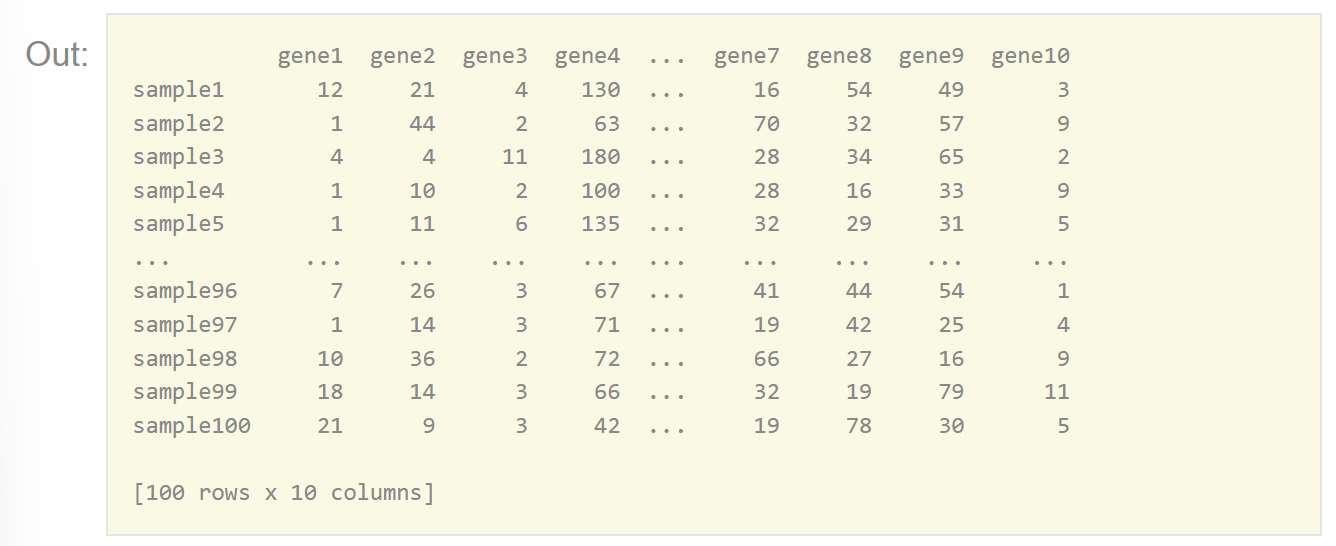

metadata example data

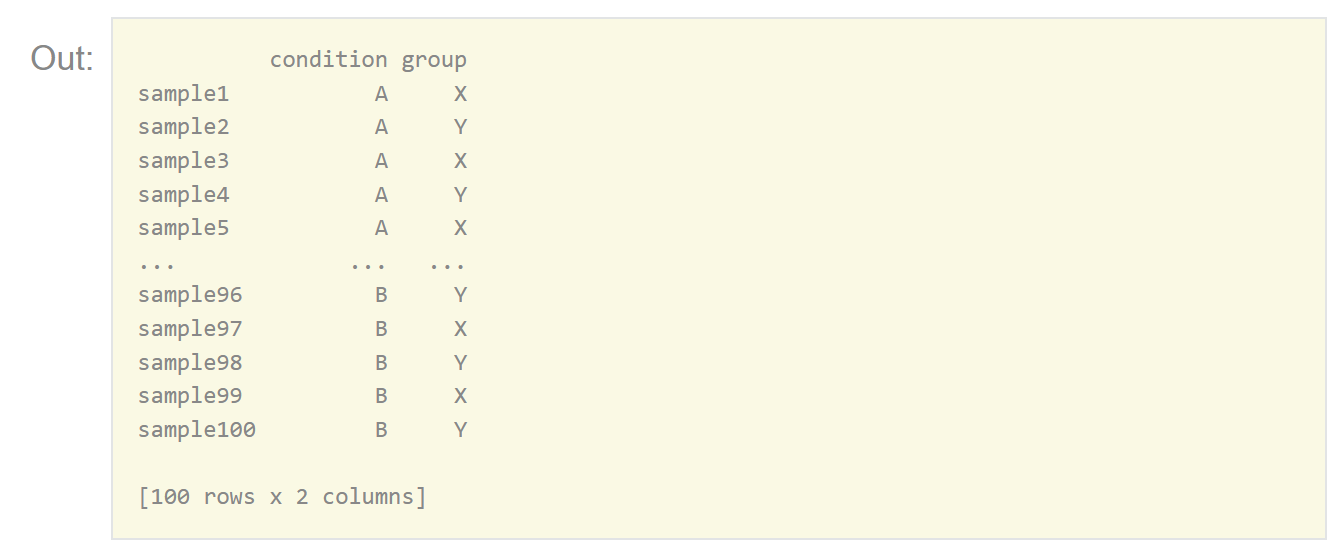

## 1.4 - Data Preprocessing

### 1.4.A) Cleaning - Removing missing or corrupted values

* It is good form to start by removing NaN (not a number) conditions
  * removing samples which are missing annotations (graphical elements used to add context to elements)






In [3]:
samples_to_keep = ~metadata.condition.isna()
counts_df = counts_df.loc[samples_to_keep]
metadata = metadata.loc[samples_to_keep]

### 1.4.B) Filtering - Removing low-count genes or outlier samples



* filter out genes that have less than 10 read counts in total
  * Note to self: look into if this count number is just for the example, or it accepted as a floor across research.

In [4]:
genes_to_keep = counts_df.columns[counts_df.sum(axis=0) >= 10]
counts_df = counts_df[genes_to_keep]

### 1.4.C) Normalization - Adjusting for sequencing depth

### 1.4.D) Type conversion

### 1.4.E) Metadata merging - Linking sample annotations with count data

### 1.4.F) Log transformation - Stabilizing variance for visualization or testing

## 1.5 - Alignment


## 1.6 - Quantification

## 1.7 - Single Factor Analysis

* for single factor analysis, we will only be using the **condition** data (metadata) as our design factor
  * we will compare **gene expressions** (counts_df) of samples that have **condition B** to those that have **condition A**

### 1.7.A) Read counts modeling with the **DeseqDataSet** class


* start by creating a **DeseqDataSet** object FROM the count and metadata data. It will:
  * fit dispersion and log-fold change (LFC) parameters from the data
  * stores them
* **DeseqDataSet** has two mandatory arguments:
  * a **counts**
  * a **metadata** dataframe
* You  need to specify a **design**
  * a Wilkinson formula that describes the design, or directly a design matrix
    * wilkinson formula
      *is a symbolic notation to express statistical models (particularly in the context of analysis of variance)
      *provides a concise way to represent relationships between variables and their interactions, including random effects.
  * in this case, the text provided a formula where the **condition** factor in **design** corresponds to a column from the **metadata** dataframe from earlier.
    * you might need to change that later.

In [5]:
inference = DefaultInference(n_cpus=8)
dds = DeseqDataSet(
    counts=counts_df,
    metadata=metadata,
    design="~condition",
    refit_cooks=True,
    inference=inference,
    # n_cpus=8, # n_cpus can be specified here or in the inference object
)

* Once a **DeseqDataSet** has bgeen initialized, you can run the **deseq2()** method to fit dispersions and LFCs

In [6]:
dds.deseq2()


if SAVE:
    with open(os.path.join(OUTPUT_PATH, "dds.pkl"), "wb") as f:
        pkl.dump(dds, f)

Using None as control genes, passed at DeseqDataSet initialization


Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.07 seconds.

Fitting dispersion trend curve...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.03 seconds.

Fitting LFCs...
... done in 0.02 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.



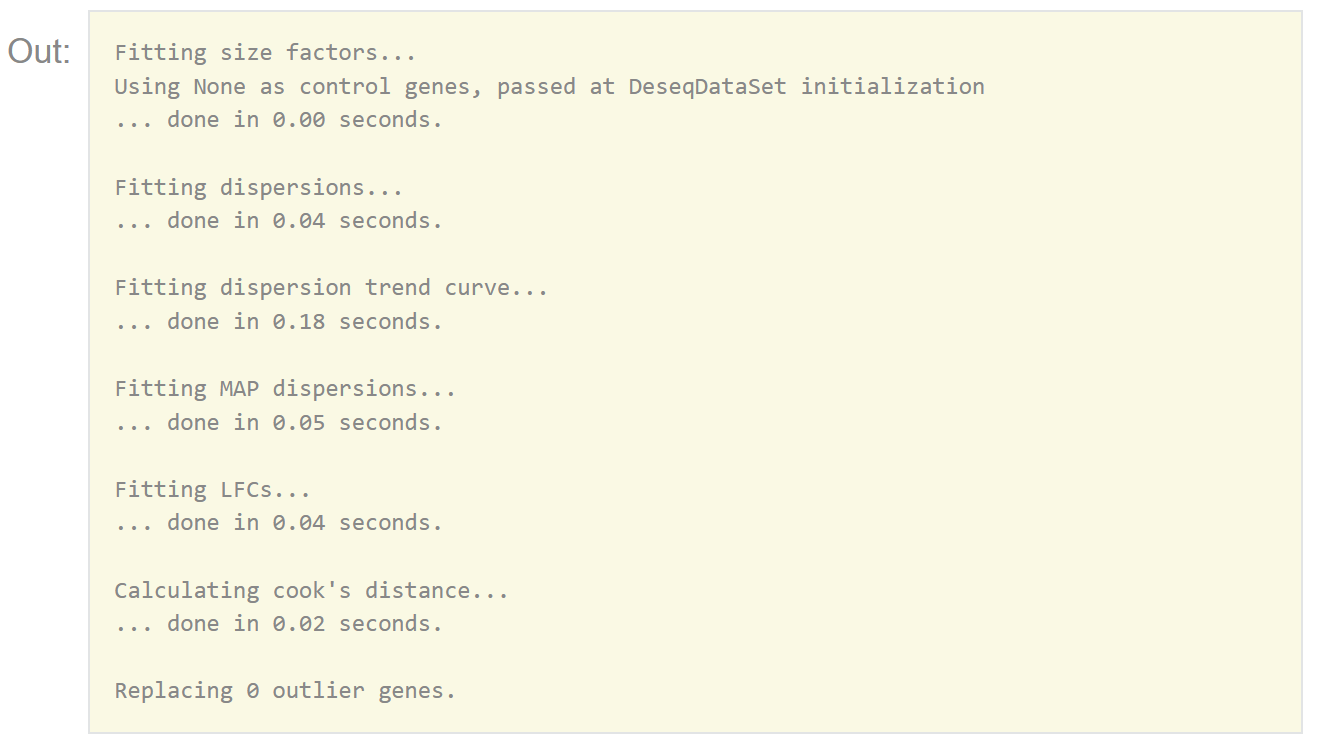

* the **DeseqDataSet** class extends the **AnnData** class
  * Hence, parameters are stored according to the AnnData data structure, with key-based data fields. In particular:
    * **X** = stores the count data,
    * **obs** = stores 1D sample-level data, such as design factors and "**size_factors**",
    * **obsm** = stores multi-dimensional sample-level data, such as "**design_matrix**",
    * **var** = stores 1D gene-level data, such as gene names and "**dispersions**"
    * **varm** = stores multi-dimensional gene-level data, such as "**LFC**"
  * something to look into later. What is AnnData?
    * when was it written/imported into the code
  * As an example, here is how we would access dispersions and LFCs (in natural log scale):
    * print(dds.var["dispersions"])
    * print(dds.varm["LFC"])

### 1.7.B) Statistical analysis with the **DeseqStats** Class

* Now that dispersions and LFCs were fitted, we can  proceed with statistical tests to compute p-values and adjusted p-values for differential expresion
  * This is the role of the **DeseqStats** class
    * Has two mandatory arguments:
      * **dds** = a *fitted* **DeseqDataSet** object
      * **contrast** = is a list of three strings of the form *["variable", "tested_level", "control_level"]*
    * syntax of **DeseqStats** class
      * ds = DeseqStats(dds, contrast=["condition", "B", "A"], inference=inference)
    * has optional keyword arguments that we'll use in the multifactor analysis section
      * see how to use the **contrast** argument to specify acccording to whic hvariable sampels should be compared.
      * keyword arguments
        * **alpha**: the p-value and adjusted p-value significance threshold (0.05 by default),
        * **cooks_filter**: whether to filter p-values based on cooks outliers (True by default),
        * **independent_filter**: whether to perform independent filtering to correct p-value trends (True by default).


#### Wald Test

* PyDESeq2 computes p-values using Wald tests.
  * can be done using the **summary()** method
    * it runs the whole statistical analysis, cooks filtering and multiple testing adjustement included
    * Results are stored in **results_df** attribute **(ds.results_df)**

In [ ]:
ds.summary()

if SAVE:
    with open(os.path.join(OUTPUT_PATH, "ds.pkl"), "wb") as f:
        pkl.dump(ds, f)

#### LFC Shrinkage
* for visualization or post-processing purposes
* Implemented by **lfc_shrink()** method
  * takes the name of the coefficient as an argument to shrink (the name of one of the columns of the design matrix **dds.obsm["design_matrix"]**
    * runnign the lfc_shrink() will overwrite a DeseqStats log fold changes and standard errors with shrunk values
      * you can check this using the shrunk_LFCs flag
        * print(ds.shrunk_LFCs)  # Will be True only if lfc_shrink() was run.

In [ ]:
ds.lfc_shrink(coeff="condition[T.B]")

if SAVE:
    with open(os.path.join(OUTPUT_PATH, "shrunk_results.pkl"), "wb") as f:
        pkl.dump(ds, f)

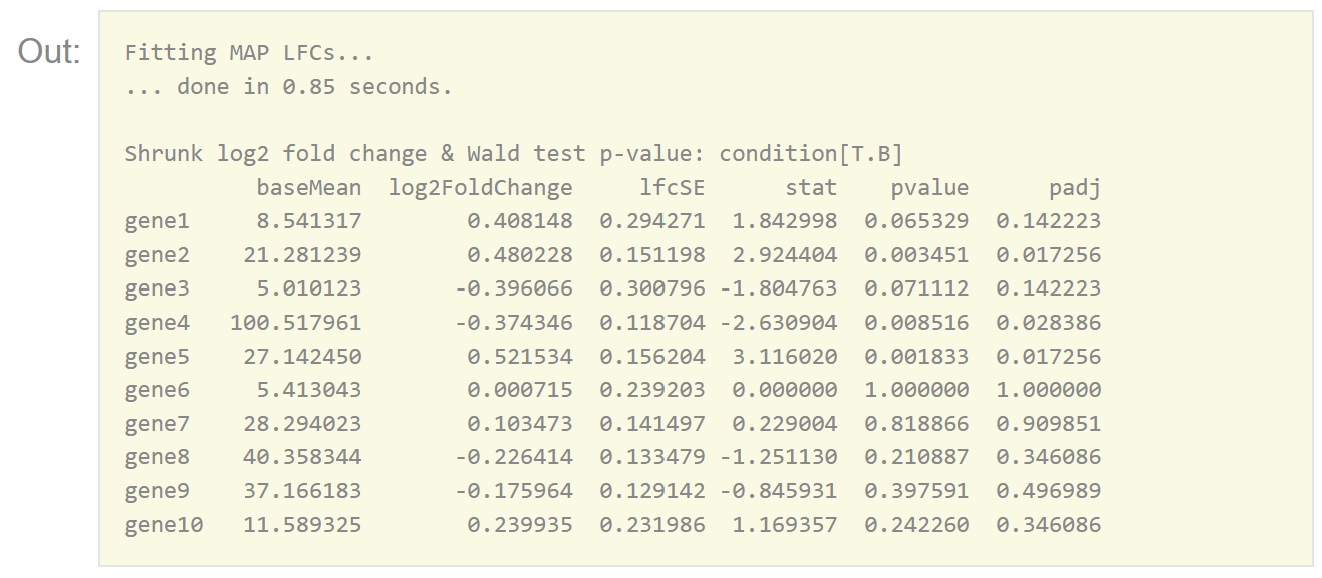

## 1.8 Multifactor Analysis

* we sill now use BOTH variables in the metadata table to fit LFCs
  * remember, so fa we have only used the **condition** column of **metadata**, which divides between **A** and **B**
    * We will not be using the second column which divides them by **group**, into **X** and **Y**
  * our GOAL of multifactor analysis  is to use both columns in analysis
* to begin, we will initialize **DeseqDataSet** justlike begore, but we gotta provide several variables that we'd like to use in the **design** argument

In [ ]:
dds = DeseqDataSet(
    counts=counts_df,
    metadata=metadata,
    design="~group + condition",
    refit_cooks=True,
    inference=inference,
)

* just like single-factor analysis, we fit dispersions and LFCs usig the **deseq2()** method

In [ ]:
dds.deseq2()

## 1.8 - Differential Expression

# **Full example deseq2 workflow**

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.6/168.6 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 3.9 MB/s eta 0:00:00
           gene1  gene2  gene3  gene4  gene5  gene6  gene7  gene8  gene9  \
sample1       12     21      4    130     18      0     16     54     49   
sample2        1     44      2     63     11     10     70     32     57   
sample3        4      4     11    180     21      3     28     34     65   
sample4        1     10      2    100     44      9     28     16

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.09 seconds.

Fitting dispersion trend curve...
... done in 0.08 seconds.

Fitting MAP dispersions...
... done in 0.07 seconds.

Fitting LFCs...
... done in 0.04 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...


AnnData object with n_obs × n_vars = 100 × 10
    obs: 'condition', 'group', 'size_factors', 'replaceable'
    var: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', '_LFC_converged', 'replaced', 'refitted', '_pvalue_cooks_outlier'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', '_mu_LFC', '_hat_diagonals'
    varm: 'LFC'
    layers: 'normed_counts', '_mu_hat', 'cooks'
gene1     0.882598
gene2     0.222578
gene3     0.837238
gene4     0.158970
gene5     0.249926
gene6     0.973647
gene7     0.235155
gene8     0.198781
gene9     0.186520
gene10    0.631900
Name: dispersions, dtype: float64
        Intercept  condition[T.B]
gene1    1.891436        0.438632
gene2    2.851662        0.373296
gene3    1.787780       -0.438645
gene4    4.741958       -0.285647
gene5    3.077798        0.403457


... done in 0.05 seconds.

Running Wald tests...
... done in 0.04 seconds.



Log2 fold change & Wald test p-value: condition B vs A
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
gene1     8.541317        0.632812  0.289101  1.842998  0.065329  0.142223
gene2    21.281239        0.538552  0.149963  2.924404  0.003451  0.017256
gene3     5.010123       -0.632830  0.295236 -1.804763  0.071112  0.142223
gene4   100.517961       -0.412102  0.118629 -2.630904  0.008516  0.028386
gene5    27.142450        0.582065  0.154706  3.116020  0.001833  0.017256
gene6     5.413043        0.001457  0.310311  0.000000  1.000000  1.000000
gene7    28.294023        0.134338  0.149945  0.229004  0.818866  0.909851
gene8    40.358344       -0.270656  0.136401 -1.251130  0.210887  0.346086
gene9    37.166183       -0.212715  0.133243 -0.845931  0.397591  0.496989
gene10   11.589325        0.386011  0.244588  1.169357  0.242260  0.346086


Fitting MAP LFCs...
... done in 0.04 seconds.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.05 seconds.

Fitting dispersion trend curve...
... done in 0.02 seconds.



Shrunk log2 fold change & Wald test p-value: condition[T.B]
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
gene1     8.541317        0.408148  0.294271  1.842998  0.065329  0.142223
gene2    21.281239        0.480228  0.151198  2.924404  0.003451  0.017256
gene3     5.010123       -0.396066  0.300796 -1.804763  0.071112  0.142223
gene4   100.517961       -0.374346  0.118704 -2.630904  0.008516  0.028386
gene5    27.142450        0.521534  0.156204  3.116020  0.001833  0.017256
gene6     5.413043        0.000715  0.239203  0.000000  1.000000  1.000000
gene7    28.294023        0.103473  0.141497  0.229004  0.818866  0.909851
gene8    40.358344       -0.226414  0.133479 -1.251130  0.210887  0.346086
gene9    37.166183       -0.175964  0.129142 -0.845931  0.397591  0.496989
gene10   11.589325        0.239935  0.231986  1.169357  0.242260  0.346086
True
          condition group
sample1           A     X
sample2           A     Y
sample3           A     X
sample

Fitting MAP dispersions...
... done in 0.04 seconds.

Fitting LFCs...
... done in 0.03 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 0.02 seconds.

Running Wald tests...


        Intercept  group[T.Y]  condition[T.B]
gene1    1.560313    0.525572        0.507013
gene2    2.812255    0.079229        0.371026
gene3    2.059577   -0.602606       -0.467002
gene4    4.919837   -0.385197       -0.293527
gene5    2.973802    0.194078        0.407582
gene6    1.846061   -0.352410       -0.013510
gene7    3.235967    0.106773        0.093654
gene8    3.640464    0.270819       -0.188248
gene9    3.645334    0.074474       -0.148346
gene10   2.136670    0.303009        0.270003
Log2 fold change & Wald test p-value: condition B vs A
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
gene1     8.541317        0.731466  0.286275  2.555117  0.010615  0.026538
gene2    21.281239        0.535278  0.149824  3.572711  0.000353  0.001178
gene3     5.010123       -0.673742  0.287399 -2.344269  0.019064  0.038129
gene4   100.517961       -0.423471  0.106221 -3.986711  0.000067  0.000592
gene5    27.142450        0.588016  0.152758  3.849332  0.000118

... done in 0.02 seconds.

Fitting MAP LFCs...
... done in 0.03 seconds.



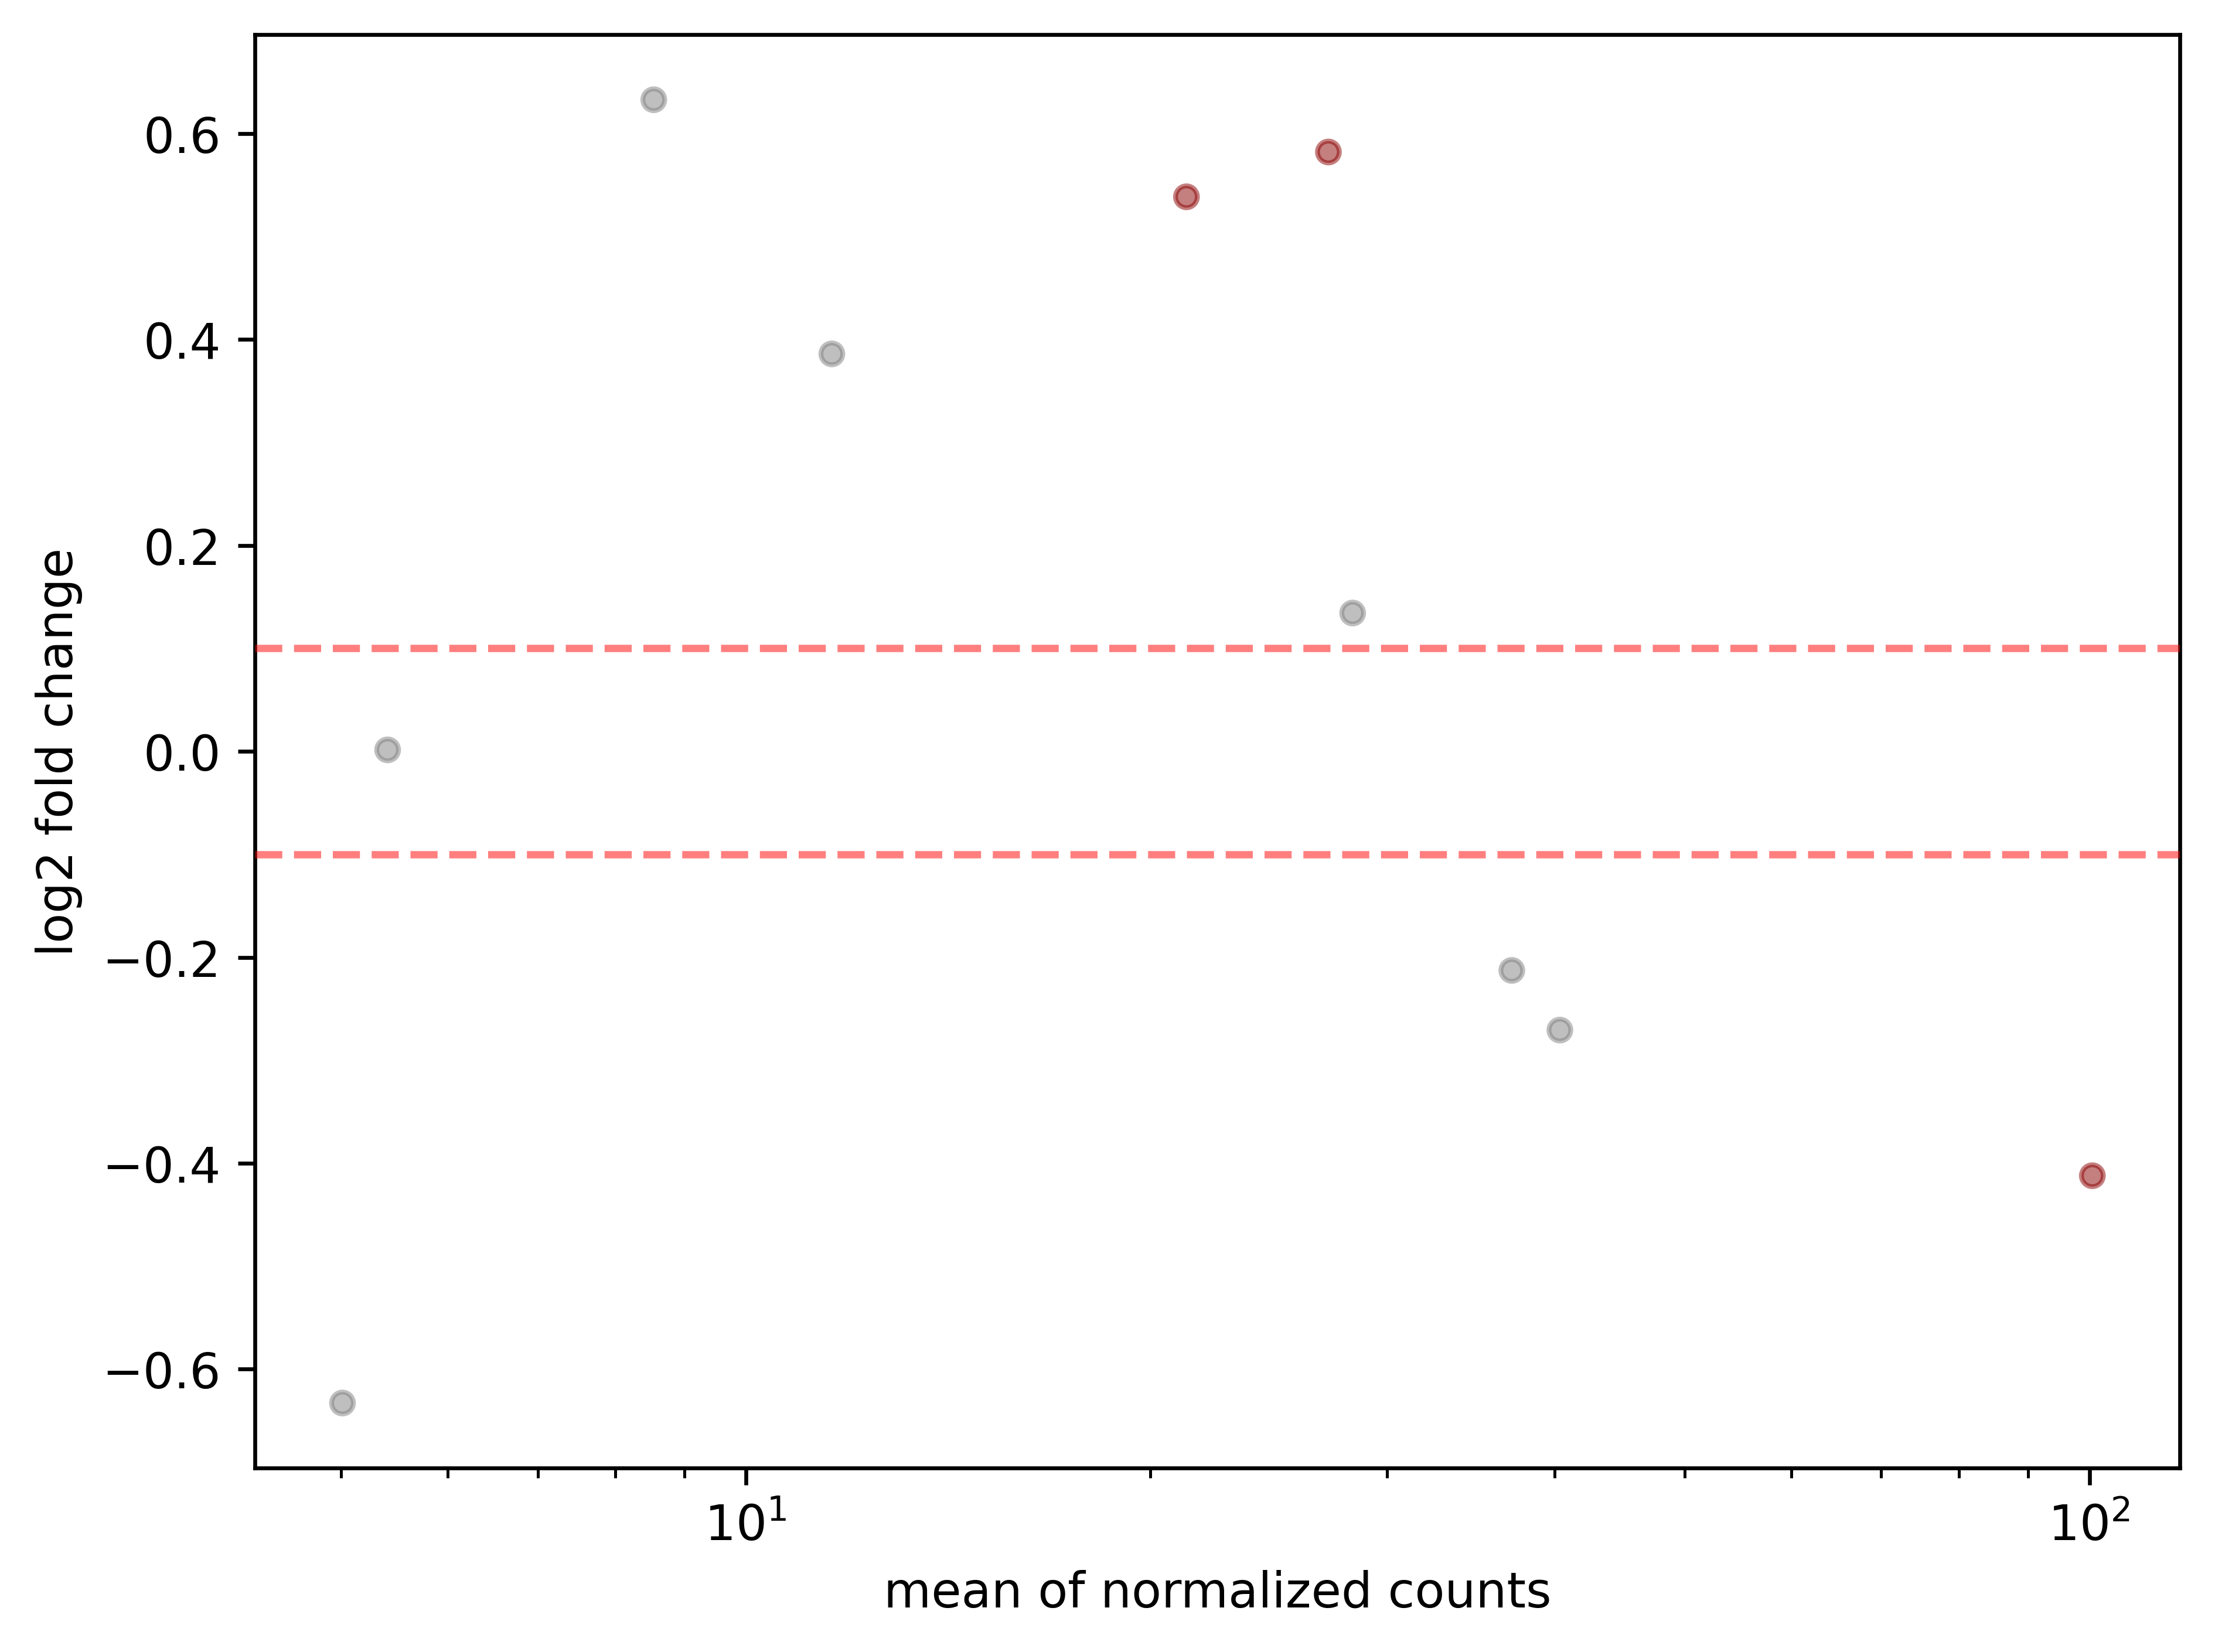

In [ ]:
"""
A simple PyDESeq2 workflow
===========================

In this example, we show how to perform a simple differential expression analysis on bulk
RNAseq data, using PyDESeq2.

.. contents:: Contents
    :local:
    :depth: 3

We start by importing required packages and setting up an optional path to save results.

"""

# %%

!pip install pydeseq2

import os
import pickle as pkl

from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats
from pydeseq2.utils import load_example_data

SAVE = False  # whether to save the outputs of this notebook

if SAVE:
    # Replace this with the path to directory where you would like results to be saved
    OUTPUT_PATH = "../output_files/synthetic_example"
    os.makedirs(OUTPUT_PATH, exist_ok=True)  # Create path if it doesn't exist

# %%
# Data loading
# ------------
#
# To perform differential expression analysis (DEA), PyDESeq2 requires two types of
# inputs:
#
#   * A count matrix of shape 'number of samples' x 'number of genes', containing
#     read counts (non-negative integers),
#   * Metadata (or "column" data) of shape 'number of samples' x
#     'number of variables', containing sample annotations that will be used
#     to split the data in cohorts.
#
# Both should be provided as `pandas dataframes
# <https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html>`_.
#
# .. currentmodule:: pydeseq2
#
# To illustrate the required data format, we load a synthetic example dataset that may be
# obtained through PyDESeq2's API using :func:`utils.load_example_data`.
# You may replace it with your own dataset.

counts_df = load_example_data(
    modality="raw_counts",
    dataset="synthetic",
    debug=False,
)

metadata = load_example_data(
    modality="metadata",
    dataset="synthetic",
    debug=False,
)

print(counts_df)

# %%
print(metadata)


# %%
# In this example, the metadata data contains two columns, ``condition`` and ``group``,
# representing two types of bi-level annotations. In the first part, we will only use the
# ``condition`` factor. Later on, we'll see how to use both the `condition` and the
# ``group`` factors in our analysis (see :ref:`multifactor_ref`).

# %%
# Data filtering
# ^^^^^^^^^^^^^^
#
# Before proceeding with DEA, it is good practice to preprocess your data, e.g. to remove
# samples for which annotations are missing and exclude genes with very low levels of
# expression. This is not necessary in the case of our synthetic data, but don't forget
# this step if you are using real data. To this end you can use the code below.
#
# We start by removing samples for which ``condition`` is ``NaN``. If you are using
# another dataset, do not forget to change "condition" for the column of ``metadata``
# you wish to use as a design factor in your analysis.

samples_to_keep = ~metadata.condition.isna()
counts_df = counts_df.loc[samples_to_keep]
metadata = metadata.loc[samples_to_keep]

# %%
# .. note::
#   In the case where the design factor contains ``NaN`` entries, PyDESeq2 will throw an
#   error when intializing a :class:`DeseqDataSet <dds.DeseqDataSet>`.

# %%
# Next, we filter out genes that have less than 10 read counts in total. Note again that
# there are no such genes in this synthetic dataset.

genes_to_keep = counts_df.columns[counts_df.sum(axis=0) >= 10]
counts_df = counts_df[genes_to_keep]

# %%
# Now that we have loaded and filtered our data, we may proceed with the differential
# analysis.


# %%
# Single factor analysis
# --------------------------
#
# In this first analysis, we ignore the ``group`` variable and use the ``condition``
# column as our design factor. That is, we compare gene expressions of samples that have
# ``condition B`` to those that have ``condition A``.
#

# %%
# .. currentmodule:: pydeseq2.dds
#
# Read counts modeling with the :class:`DeseqDataSet` class
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
#
# We start by creating a :class:`DeseqDataSet`
# object from the count and metadata data.
# A :class:`DeseqDataSet` fits dispersion and
# log-fold change (LFC) parameters from the data, and stores them.
#

inference = DefaultInference(n_cpus=8)
dds = DeseqDataSet(
    counts=counts_df,
    metadata=metadata,
    design="~condition",
    refit_cooks=True,
    inference=inference,
    # n_cpus=8, # n_cpus can be specified here or in the inference object
)

# %%
# A :class:`DeseqDataSet` has two mandatory
# arguments: a ``counts`` and a ``metadata`` dataframe, like the ones we've loaded in the
# first part of this tutorial.
#
# Next, we should specify a ``design``, i.e. a Wilkinson formula that describes the
# design, or directly a design matrix. Here we provide a formula, which is a string
# that `formulaic <https://github.com/matthewwardrop/formulaic>`_ should be able to
# parse.
#
# .. note::
#   The ``"condition"`` factor in ``design`` corresponds to a column
#   from the ``metadata`` dataframe we loaded earlier.
#   You might need to change it according to your own dataset.
#
# Several other arguments may be optionally specified (see the :doc:`API documentation
# </api/docstrings/pydeseq2.dds.DeseqDataSet>`).
# Among those, the ``refit_cooks`` argument (set to ``True`` by default), controls
# whether Cooks outlier should be refitted (which is advised, in general) and ``n_cpus``
# sets the number of CPUs to use for computation. Here, we use 8 threads. Feel free to
# adapt this to your setup or to set to ``None`` to use all available CPUs.
#
# .. note::
#     In the case of the provided synthetic data, there won't be any Cooks outliers.
#
# Once a :class:`DeseqDataSet` was initialized,
# we may run the :meth:`deseq2() <DeseqDataSet.deseq2>` method
# to fit dispersions and LFCs.
#
#


dds.deseq2()


if SAVE:
    with open(os.path.join(OUTPUT_PATH, "dds.pkl"), "wb") as f:
        pkl.dump(dds, f)

# %%
# The :class:`DeseqDataSet` class extends the
# :class:`AnnData <anndata.AnnData>`
# class.

print(dds)

# %%
# Hence, parameters are stored according to the :class:`AnnData <anndata.AnnData>` data
# structure, with key-based data fields. In particular,
#
# - ``X`` stores the count data,
# - ``obs`` stores 1D sample-level data, such as design factors and ``"size_factors"``,
# - ``obsm`` stores multi-dimensional sample-level data, such as ``"design_matrix"``,
# - ``var`` stores 1D gene-level data, such as gene names and ``"dispersions"``,
# - ``varm`` stores multi-dimensional gene-level data, such as ``"LFC"``.
#
#
# As an example, here is how we would access dispersions and LFCs
# (in natural log scale):

# %%

print(dds.var["dispersions"])

# %%

print(dds.varm["LFC"])

# %%
# .. currentmodule:: pydeseq2.ds
#
# Statistical analysis with the :class:`DeseqStats` class
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
#
# Now that dispersions and LFCs were fitted, we may proceed with statistical tests to
# compute p-values and adjusted p-values for differential expresion. This is the role of
# the :class:`DeseqStats` class. It has two mandatory arguments:
#
# - ``dds``, which should be a *fitted* :class:`DeseqDataSet <pydeseq2.dds.DeseqDataSet>`
#   object,
# - ``contrast``, which is a list of three strings of the form
#   ``["variable", "tested_level", "control_level"]``, or directly a contrast vector.
#

ds = DeseqStats(dds, contrast=["condition", "B", "A"], inference=inference)

# %%
# It also has a set of optional keyword arguments (see the :doc:`API documentation
# </api/docstrings/pydeseq2.ds.DeseqStats>`), among which:
#
# - ``alpha``: the p-value and adjusted p-value significance threshold (``0.05``
#   by default),
# - ``cooks_filter``: whether to filter p-values based on cooks outliers
#   (``True`` by default),
# - ``independent_filter``: whether to perform independent filtering to correct
#   p-value trends (``True`` by default).
#
# In the :ref:`section on multifactor analysis<multifactor_ref>`, we will also see how
# to use the ``contrast`` argument to specify according to which variable samples should
# be compared.

# %%
# .. _wald_ref:
#
# Wald test
# """"""""""
#
# PyDESeq2 computes p-values using Wald tests. This can be done using the
# :meth:`summary() <DeseqStats.summary>` method, which runs the whole statistical
# analysis, cooks filtering and multiple testing adjustement included.

ds.summary()

if SAVE:
    with open(os.path.join(OUTPUT_PATH, "ds.pkl"), "wb") as f:
        pkl.dump(ds, f)

# %%
# The results are then stored in the ``results_df`` attribute (``ds.results_df``).

# %%
# Optional: threshold-based tests
# """"""""""""""""""""""""""""""""
#
# The user can specify a (log2) log fold change under the null hypothesis and an
# alternative hypothesis to re-compute Wald statistics and p-values.
# The alternative hypothesis corresponds to what the user wants to find rather than the
# null hypothesis. It can take one of the values
# ``["greaterAbs", "lessAbs", "greater", "less"]``.

ds.summary(lfc_null=0.1, alt_hypothesis="greaterAbs")
ds.plot_MA(s=20)

# %%
# LFC shrinkage
# """""""""""""
#
# For visualization or post-processing purposes, it might be suitable to perform
# LFC shrinkage. This is implemented by the :meth:`lfc_shrink() <DeseqStats.lfc_shrink>`
# method, which takes as argument the name of the coefficient to shrink (i.e., the name
# of one of the columns of the design matrix ``dds.obsm["design_matrix"]``).
# For instance, to shrink the LFCs of the ``condition B`` samples, we would run:

ds.lfc_shrink(coeff="condition[T.B]")

if SAVE:
    with open(os.path.join(OUTPUT_PATH, "shrunk_results.pkl"), "wb") as f:
        pkl.dump(ds, f)

# %%
# .. note::
#   Running :meth:`lfc_shrink() <DeseqStats.lfc_shrink>` will overwrite a
#   :class:`DeseqStats`' log fold changes (and standard errors) with shrunk values.
#   This can be checked using the ``shrunk_LFCs`` flag.
#

print(ds.shrunk_LFCs)  # Will be True only if lfc_shrink() was run.

# %%
# .. _multifactor_ref:
#
# Multifactor analysis
# ---------------------
#
# .. currentmodule:: pydeseq2.dds
#
# So far, we have only used the ``condition`` column of ``metadata``, which divides
# samples between conditions ``A`` and ``B``. Yet, ``metadata`` contains second
# column, which separates samples according to ``group`` ``X`` and ``Y``.

print(metadata)

# %%
# The goal of multifactor analysis is to use *both* variables to fit LFCs.
#
# Read counts modeling
# ^^^^^^^^^^^^^^^^^^^^^
#
# To perform multifactor analysis with PyDESeq2, we start by inializing a
# :class:`DeseqDataSet` as previously, but we provide several variables we would like
# to use in the ``design`` argument.
#

dds = DeseqDataSet(
    counts=counts_df,
    metadata=metadata,
    design="~group + condition",
    refit_cooks=True,
    inference=inference,
)
# %%
# As for the single-factor analysis, we fit dispersions and LFCs using the
# :meth:`deseq2() <DeseqDataSet.deseq2>` method.

dds.deseq2()

# %%
# Now, if we print log fold changes, we will have two columns in addition to the
# intercept: one corresponding to the ``group`` variable, and the other to ``condition``.

print(dds.varm["LFC"])

# %%
# .. currentmodule:: pydeseq2.ds
#
# Statistical analysis
# ^^^^^^^^^^^^^^^^^^^^
#
# P-values are computed as earlier from a :class:`DeseqStats` object with the
# :meth:`summary() <DeseqStats.summary>` method. The ``contrast`` argument will allow us
# to determines which variable we want to obtain LFCs and pvalues for.
# It is a list of three strings of the form
# ``["variable", "tested level", "reference level"]``
# As an example, to compare the condition B to the condition A, we set
# ``contrast=["condition", "B", "A"]``.
#

ds_B_vs_A = DeseqStats(dds, contrast=["condition", "B", "A"], inference=inference)

# %%
#
# Let us fit p-values:
#

ds_B_vs_A.summary()


# %%
# As we can see, although we are comparing the same cohorts (condition B vs A), the
# results differ from the :ref:`single-factor analysis <wald_ref>`. This is because the
# model uses information from both the ``condition`` and ``group`` variables.
#
# Let us now evaluate differential expression according to group Y vs X. To do so,
# we create a new :class:`DeseqStats` from the same
# :class:`DeseqDataSet <pydeseq2.dds.DeseqDataSet>`
# with ``contrast=["group", "Y", "X"]``, and run the analysis again.

ds_Y_vs_X = DeseqStats(dds, contrast=["group", "Y", "X"], inference=inference)
ds_Y_vs_X.summary()

# %%
# LFC shrinkage (multifactor)
# """""""""""""""""""""""""""
#
# In a multifactor setting, LFC shrinkage works as in the single-factor case, but will
# only shrink the LFCs of a :class:`DeseqStats` object based on its
# ``contrast`` argument.

ds_B_vs_A.lfc_shrink(coeff="condition[T.B]")


# **Part 2: My Brain-Friendly Rewrites and Tinkering**

### 2.1 - Starter Notes

* Using PyDESeq2 due to my comfort with Python. I will be using the comfort as a crutch _only as I learn the logic_. The goal is to understand how DESeq2 works.
* After understanding the logic and how it works in Python, I will take the time to learn R in order to apply to labs and to follow established pipelines.

### 2.2 - Code Prep



* So, Since we're (me) are coding on  Google Colab, it needs a special type of code prep to begin. ABSOLUTELY REQUIRED WITH COLAB
  * Code : !pip install pydeseq2


### 2.2 - Refactored Preprocessing

### 2.3 - Notes on Troubleshooting

### 2.4 - Annnotated Visualization Tweaks

# **My own full PyDeseq2 workflow**

# **Resources**


## Links
* Step-by-step PyDESeq2 workflow - https://pydeseq2.readthedocs.io/en/stable/auto_examples/plot_step_by_step.html
* A simple PyDESeq2 workflow - https://pydeseq2.readthedocs.io/en/latest/auto_examples/plot_minimal_pydeseq2_pipeline.html


## References
* Differential Expression with DEseq2 - https://genviz.org/module-04-expression/0004/02/01/DifferentialExpression/#:~:text=Differential%20expression%20analysis%20is%20used,untreated%20samples).

## Glossary of Terms